In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import eda_helper_functions
import missingno as msno
%matplotlib inline

from sklearn.ensemble import IsolationForest

In [2]:
#!python --version

# Read The Training Data
We'll do eda on training data only

In [3]:
file_path = r"C:\Users\abhid\Desktop\campusx\flightprice_sagemaker\data\train.csv"

train = pd.read_csv(file_path)

In [4]:
train.head(3)

,airline,date_of_journey,source,destination,dep_time,arrival_time,total_stops,additional_info,duration_min,price
0,Jet Airways,2019-05-27,Delhi,Cochin,20:55:00,12:35:00,1,In-flight meal not included,940,12898
1,Jet Airways,2019-06-12,Kolkata,Banglore,18:55:00,16:20:00,1,No Info,1285,13044
2,Air India,2019-05-18,Delhi,Cochin,09:45:00,09:25:00,2,No Info,1420,10975


## Fixing Data Types

In [5]:
train.dtypes

airline            object
date_of_journey    object
source             object
destination        object
dep_time           object
arrival_time       object
total_stops         int64
additional_info    object
duration_min        int64
price               int64
dtype: object

In [6]:
train['date_of_journey'] = pd.to_datetime(train['date_of_journey'])
train['dep_time'] = pd.to_datetime(train['dep_time']).dt.time
train['arrival_time'] = pd.to_datetime(train['arrival_time']).dt.time

C:\Users\abhid\AppData\Local\Temp\ipykernel_10640\4010644293.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train['dep_time'] = pd.to_datetime(train['dep_time']).dt.time
C:\Users\abhid\AppData\Local\Temp\ipykernel_10640\4010644293.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train['arrival_time'] = pd.to_datetime(train['arrival_time']).dt.time


In [7]:
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time                   object
arrival_time               object
total_stops                 int64
additional_info            object
duration_min                int64
price                       int64
dtype: object

## High Level Summary of the Data

In [8]:
train.describe()

,date_of_journey,total_stops,duration_min,price
count,6694,6694.000000,6694.000000,6694.000000
mean,2019-05-04 11:43:39.061846528,0.812668,637.633702,9092.553331
min,2019-03-01 00:00:00,0.000000,75.000000,1759.000000
25%,2019-03-27 00:00:00,0.000000,170.000000,5277.000000
50%,2019-05-15 00:00:00,1.000000,515.000000,8372.000000
75%,2019-06-06 00:00:00,1.000000,925.000000,12373.000000
max,2019-06-27 00:00:00,3.000000,2860.000000,79512.000000
std,NaN,0.658143,504.395941,4670.489223


In [9]:
train.describe(include = 'O')

,airline,source,destination,dep_time,arrival_time,additional_info
count,6694,6694,6694,6694,6694,6694
unique,12,5,5,218,218,8
top,Jet Airways,Delhi,Cochin,18:55:00,19:00:00,No Info
freq,2382,2781,2781,154,396,5226


## Missing Value Inspection

<Axes: >

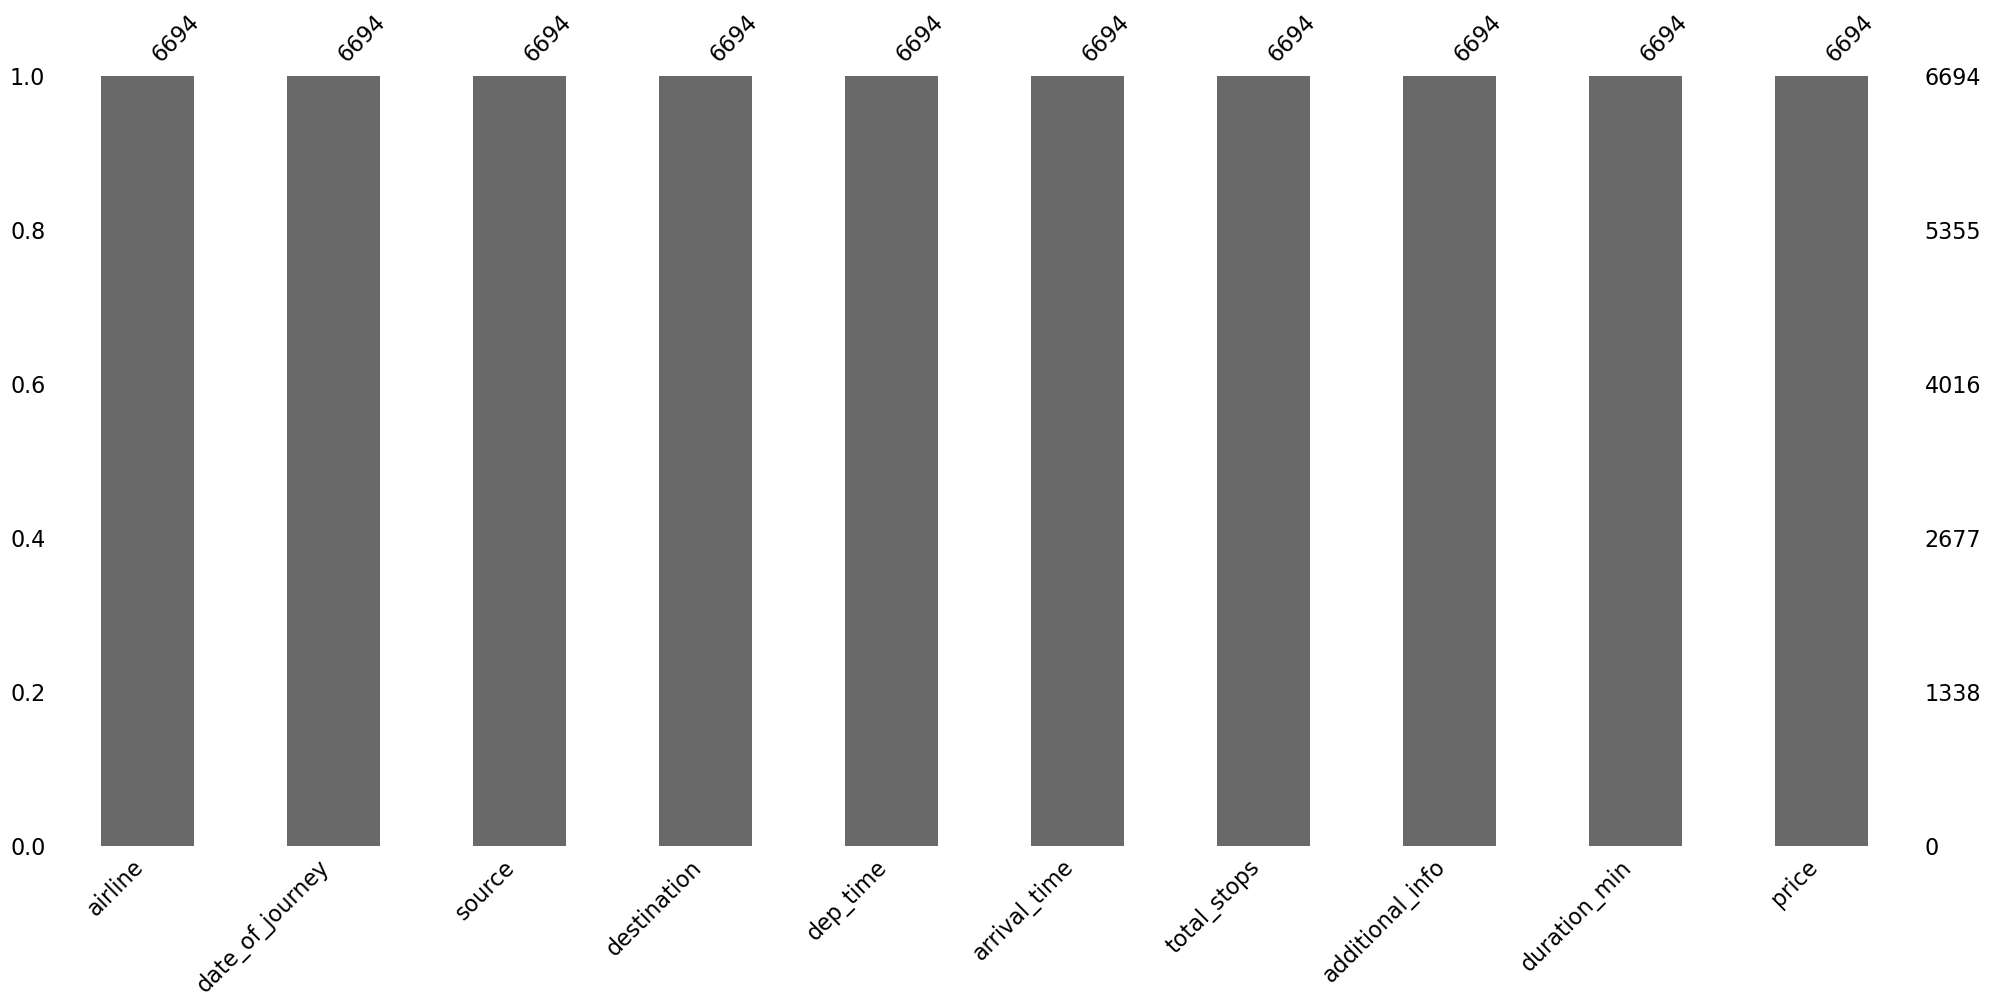

In [13]:
msno.bar(train)

## High Level Analysis of Outliers

In [16]:
forest = IsolationForest(n_estimators = 50,random_state = 28)

outlier = forest.fit_predict(train.drop(columns = 'price').select_dtypes(include = 'number'))

In [18]:
train['outlier'] = outlier

In [20]:
train.query('outlier==-1')

,airline,date_of_journey,source,destination,dep_time,arrival_time,total_stops,additional_info,duration_min,price,outlier
2,Air India,2019-05-18,Delhi,Cochin,09:45:00,09:25:00,2,No Info,1420,10975,-1
3,Indigo,2019-06-03,Mumbai,Hyderabad,21:20:00,22:50:00,0,No Info,90,2227,-1
4,Jet Airways,2019-04-01,Mumbai,Hyderabad,02:55:00,04:20:00,0,No Info,85,5678,-1
7,Jet Airways,2019-05-09,Delhi,Cochin,23:05:00,04:25:00,2,No Info,1760,15129,-1
8,Jet Airways,2019-06-12,Kolkata,Banglore,14:05:00,10:05:00,1,No Info,1200,13044,-1
...,...,...,...,...,...,...,...,...,...,...,...
6678,Jet Airways,2019-03-24,Banglore,New Delhi,05:45:00,10:25:00,1,In-flight meal not included,280,8147,-1
6681,Jet Airways,2019-06-21,Delhi,Cochin,11:00:00,14:15:00,0,In-flight meal not included,195,4256,-1
6682,Jet Airways,2019-05-01,Kolkata,Banglore,09:35:00,14:25:00,1,No Info,1730,11467,-1
6687,Jet Airways,2019-06-15,Delhi,Cochin,21:25:00,12:35:00,2,In-flight meal not included,910,9905,-1


## Pair Plots

C:\Users\abhid\anaconda3\envs\sagenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\abhid\anaconda3\envs\sagenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\abhid\anaconda3\envs\sagenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\abhid\anaconda3\envs\sagenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

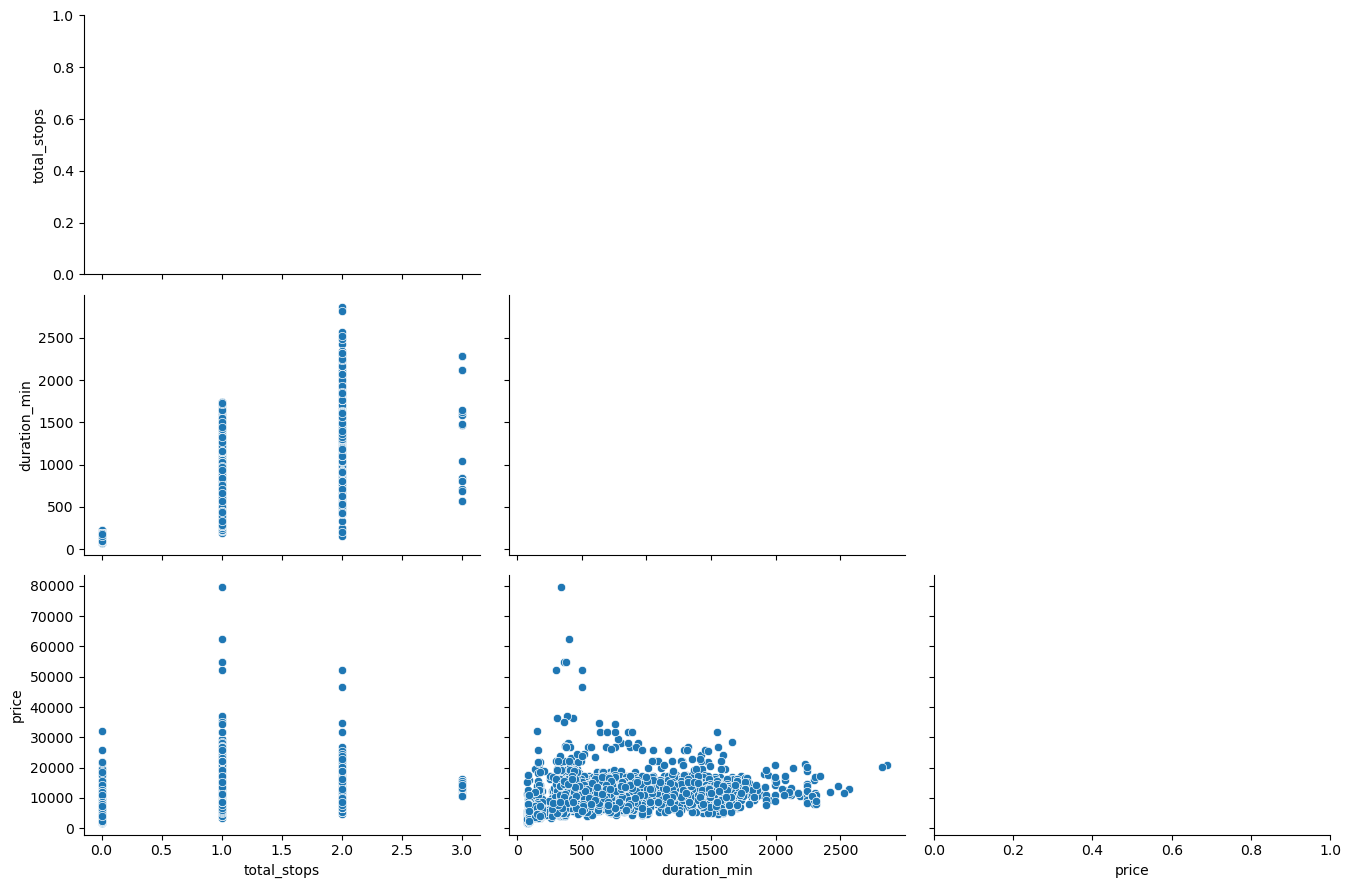

In [22]:
eda_helper_functions.pair_plots(train.drop(columns = 'outlier'))

## Correlation Analysis

<Axes: >

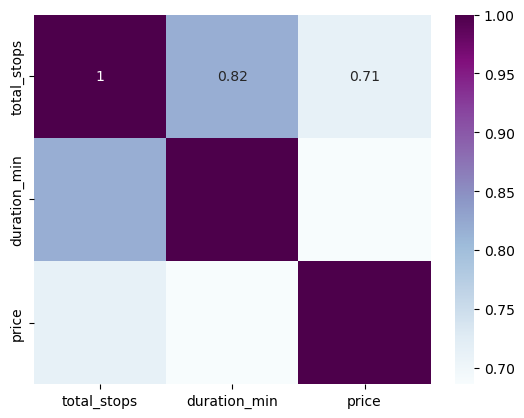

In [30]:
sns.heatmap(train.drop(columns = 'outlier').select_dtypes(include = 'number').corr(method = 'spearman'),annot = True,cmap='BuPu')

C:\Users\abhid\anaconda3\envs\sagenv\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


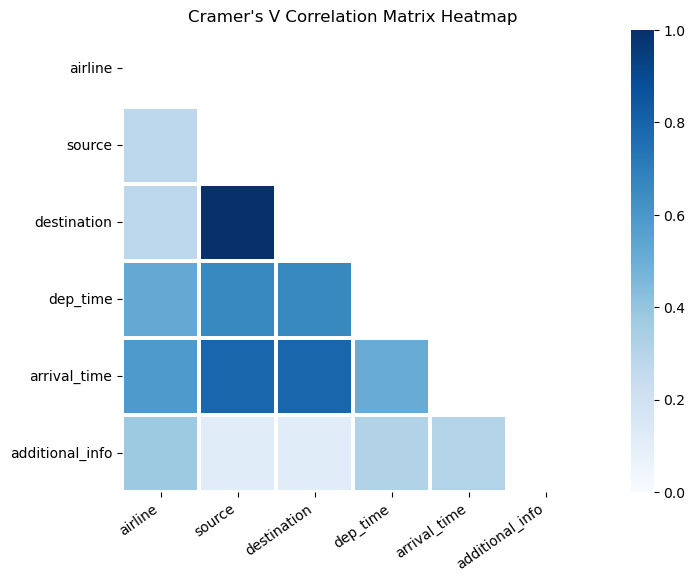

In [28]:
# for finding correlation between categorical variables
eda_helper_functions.cramersV_heatmap(train)